# Project Description

1. Aggreagate training between each match and training data before match



In [5]:
# PAckages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Data loading and Preprocess



In [6]:
GPS = pd.read_csv('data/gps.csv')
RPE = pd.read_csv('data/rpe.csv')
WEL = pd.read_csv('data/wellness.csv')
GAMES = pd.read_csv('data/games.csv')

In [7]:
GAMES.describe()

,GameID,TournamentGame,TeamPoints,TeamPointsAllowed
count,38.000000,38.000000,38.000000,38.000000
mean,19.500000,3.263158,21.210526,16.526316
std,11.113055,1.638790,10.552719,8.937431
min,1.000000,1.000000,0.000000,0.000000
25%,10.250000,2.000000,14.750000,12.000000
50%,19.500000,3.000000,21.500000,14.000000
75%,28.750000,4.750000,28.750000,24.000000
max,38.000000,6.000000,43.000000,34.000000


In [8]:
WEL.describe()

,PlayerID,Fatigue,Soreness,Desire,Irritability,SleepHours,SleepQuality,MonitoringScore,USG
count,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,629.000000
mean,8.711834,3.412493,3.351626,3.829575,3.969467,8.661894,3.805228,18.368390,1.022016
std,4.890699,1.019410,1.018044,1.011161,0.795487,1.418457,1.170487,3.702186,0.027090
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,5.000000,1.003000
25%,4.000000,3.000000,3.000000,3.000000,4.000000,8.000000,3.000000,16.000000,1.014000
50%,9.000000,3.000000,3.000000,4.000000,4.000000,8.750000,4.000000,18.000000,1.017000
75%,13.000000,4.000000,4.000000,4.000000,4.000000,9.250000,4.000000,20.000000,1.020000
max,17.000000,7.000000,7.000000,7.000000,7.000000,22.500000,7.000000,35.000000,1.200000


In [9]:
RPE.describe()

,PlayerID,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating
count,8860.000000,7621.000000,7621.000000,7621.000000,3149.000000,4349.000000,4383.000000,4349.000000,4724.000000,4751.000000
mean,9.019187,55.656082,4.166907,252.703845,612.550969,316.266774,335.385311,1.051058,7.918078,8.123342
std,4.912426,26.753594,2.206222,195.200977,395.790918,164.226498,131.079818,0.684823,1.449064,1.447300
min,1.000000,2.000000,0.000000,0.000000,0.000000,3.100000,1.430000,0.010000,0.000000,0.000000
25%,5.000000,33.000000,3.000000,120.000000,290.000000,188.600000,251.015000,0.640000,7.000000,8.000000
50%,9.000000,60.000000,4.000000,216.000000,580.000000,299.300000,334.290000,0.920000,8.000000,8.000000
75%,13.000000,75.000000,5.000000,360.000000,900.000000,432.100000,424.840000,1.270000,9.000000,9.000000
max,17.000000,245.000000,9.000000,1440.000000,2300.000000,790.700000,695.890000,4.020000,10.000000,10.000000


In [10]:
GPS.describe()

,GameID,Half,PlayerID,FrameID,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
count,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,4.570160e+06,3.054917e+06,4.570160e+06
mean,1.923012e+01,1.498626e+00,8.528556e+00,2.606400e+03,1.077363e+00,9.098921e-01,1.758338e-02,-3.578122e-03,6.970135e-01,5.002148e-01,4.555896e+00,2.410195e+01
std,1.111727e+01,4.999982e-01,4.879095e+00,1.540146e+03,1.428866e+00,1.296938e+00,3.484887e-02,3.066628e-01,6.388154e-01,4.468712e-01,6.795329e+01,3.145520e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.678750e+00,-5.922500e+00,-9.733750e+00,-8.914572e+01,-8.757981e+01
25%,1.000000e+01,1.000000e+00,4.000000e+00,1.289000e+03,0.000000e+00,0.000000e+00,1.538392e-03,-1.537500e-01,4.837500e-01,2.900000e-01,-8.159299e+01,2.499372e+01
50%,1.900000e+01,1.000000e+00,8.000000e+00,2.577000e+03,4.916671e-01,2.222224e-01,4.327333e-03,-1.250000e-03,8.450000e-01,5.100000e-01,2.253125e+00,3.777820e+01
75%,2.900000e+01,2.000000e+00,1.300000e+01,3.865000e+03,1.586112e+00,1.416668e+00,1.764683e-02,1.450000e-01,1.021250e+00,7.850000e-01,5.546727e+01,4.844337e+01
max,3.800000e+01,2.000000e+00,2.100000e+01,6.760000e+03,9.016674e+00,5.972227e+00,2.072141e+00,8.588750e+00,7.302500e+00,7.256250e+00,8.855080e+01,4.884404e+01


## Visualization


['AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'FrameID', 'GameClock', 'GameID', 'Half', 'Latitude', 'Longitude', 'PlayerID', 'Speed', 'Time', '__bytes__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_accessors', '_add_numeric_operations', '_agg_doc', '_aggregate', '_aggregate_generic', '_aggregate_item_by_item', '_aggregate_multiple_funcs', '_apply_filter', '_apply_to_column_groupbys', '_apply_whitelist', '_assure_grouper', '_block_agg_axis', '_bool_agg', '_builtin_table', '_choose_path', '_concat_objects', '_constructor', '_cumcount_array', '_cython_agg_blocks', '_cython_agg_general', '_cython_table', '_cytho

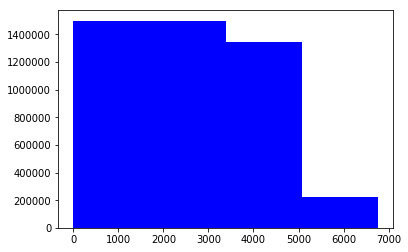

In [11]:
plt.hist(GPS['FrameID'], 4,  facecolor ='blue')
time_frame = GPS.groupby('GameID')
print(dir(time_frame))
#time_frame.plot(title="Match Data")

In [12]:
print(GPS.index)
print(GPS.columns)
#print(GPS.values)
print(GPS['GameID'])
GPS.loc[1:3]


RangeIndex(start=0, stop=4570160, step=1)
Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude'],
      dtype='object')
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
           ..
4570130    38
4570131    38
4570132    38
4570133    38
4570134    38
4570135    38
4570136    38
4570137    38
4570138    38
4570139    38
4570140    38
4570141    38
4570142    38
4570143    38
4570144    38
4570145    38
4570146    38
4570147    38
4570148    38
4570149    38
4570150    38
4570151    38
4570152    38
457

,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
1,1,1,2,2,00:22:01,00:00:00,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874
2,1,1,2,3,00:22:01,00:00:00,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874
3,1,1,2,4,00:22:01,00:00:00,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874


In [13]:
RPE.loc[1:10]

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely
5,2018-07-20,11,Yes,Mobility/Recovery,15.0,2.0,30.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely
6,2018-07-20,13,Yes,Game,27.0,6.0,162.0,306.0,259.4,287.32,0.90,NaN,NaN,Not at all
7,2018-07-20,13,Yes,Game,24.0,6.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
8,2018-07-20,13,Yes,Mobility/Recovery,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
9,2018-07-19,1,Yes,Skills,60.0,3.0,180.0,180.0,87.9,140.54,0.63,NaN,NaN,NaN
10,2018-07-19,2,Yes,Skills,60.0,4.0,240.0,240.0,117.1,279.96,0.42,NaN,NaN,NaN


In [14]:
WEL.loc[1:100]

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%
5,2018-07-21,7,2,2,5,4,22:00:00,07:00:00,9.00,3,16,No,No,No,Excellent,Yes,Yes,1.014,95%
6,2018-07-21,10,2,2,4,4,22:30:00,05:45:00,7.25,3,15,No,Slightly Off,No,Excellent,Yes,Yes,1.017,70%
7,2018-07-21,11,4,3,6,4,23:00:00,07:00:00,8.00,3,20,No,Slightly Off,No,Excellent,Yes,Yes,1.013,100%
8,2018-07-21,13,4,3,5,4,23:15:00,07:15:00,8.00,4,20,No,No,No,Excellent,Yes,Yes,1.025,100%
9,2018-07-21,14,3,3,4,4,22:15:00,07:00:00,8.75,4,18,No,No,No,Excellent,Yes,Yes,1.015,100%
10,2018-07-21,15,4,3,6,5,22:30:00,07:00:00,8.50,7,25,No,No,No,Excellent,Yes,No,NaN,95%


In [15]:
GAMES.loc[1:3]

,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19


In [16]:
WEL.columns


Index(['Date', 'PlayerID', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'USGMeasurement', 'USG', 'TrainingReadiness'],
      dtype='object')

In [17]:
WEL['Date'][1] > WEL['Date'][100]
#WEL.replace({''})

True

In [19]:
len(WEL.groupby('PlayerID').size())

17

In [20]:
# use pytorch to fit the model
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [26]:
models = []
epoches = 50
train_data = None

for i in range(len(WEL.groupby('PlayerID').size())):
    tmp = WEL.loc[WEL['PlayerID'] == i+1, ['Fatigue', 'Irritability', 'SleepQuality','Desire', 'Soreness','SleepHours', 'MonitoringScore']]
    Y = WEL.loc[WEL['PlayerID'] == i+1, 'Fatigue'].values
    X = WEL.loc[WEL['PlayerID'] == i+1, ['Irritability', 'SleepQuality','Desire', 'Soreness','SleepHours', 'MonitoringScore']].values

    y_data = Y
    x_data = X

    train_data = np.hstack((x_data, y_data[:,None])) if (train_data is None) else np.vstack((train_data, np.hstack((x_data, y_data[:,None]))))
    
    
D_in = 6


model= nn.Sequential(
   # nn.BatchNorm1d(D_in),
    nn.Linear(D_in, 64),
    nn.Linear(64,32),
    nn.Linear(32,1),
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# shuffle data
np.random.shuffle(train_data)

     
for epoch in range(epoches):
    running_loss = 0.0
    for i in range(int(train_data.shape[0]/100)):
        # get the inputs
        inputs = train_data[:,:6][i*20: (i+1)*20]
        labels = train_data[:,6][i*20: (i+1)*20]
        
        inputs = torch.tensor(inputs, device=device).float()
        labels = torch.tensor(labels, device=device).float()
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
    

2
[1,    20] loss: 0.840
[1,    40] loss: 0.198
[2,    20] loss: 0.122
[2,    40] loss: 0.149
[3,    20] loss: 0.114
[3,    40] loss: 0.145
[4,    20] loss: 0.113
[4,    40] loss: 0.144
[5,    20] loss: 0.112
[5,    40] loss: 0.144
[6,    20] loss: 0.112
[6,    40] loss: 0.144
[7,    20] loss: 0.112
[7,    40] loss: 0.144
[8,    20] loss: 0.111
[8,    40] loss: 0.144
[9,    20] loss: 0.111
[9,    40] loss: 0.143
[10,    20] loss: 0.111
[10,    40] loss: 0.143
[11,    20] loss: 0.111
[11,    40] loss: 0.143
[12,    20] loss: 0.110
[12,    40] loss: 0.142
[13,    20] loss: 0.110
[13,    40] loss: 0.141
[14,    20] loss: 0.110
[14,    40] loss: 0.141
[15,    20] loss: 0.109
[15,    40] loss: 0.140
[16,    20] loss: 0.109
[16,    40] loss: 0.139
[17,    20] loss: 0.108
[17,    40] loss: 0.139
[18,    20] loss: 0.108
[18,    40] loss: 0.138
[19,    20] loss: 0.108
[19,    40] loss: 0.137
[20,    20] loss: 0.107
[20,    40] loss: 0.137
[21,    20] loss: 0.107
[21,    40] loss: 0.136
[22,    